In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 14.8 MB/s eta 0:00:00a 0:00:01


In [4]:
from ultralytics import YOLO
import os
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 181MB/s]


In [5]:
# Train the model
model.train(
    data='/kaggle/input/counting/data.yaml',  # Path to data.yaml
    epochs=100,  # Number of epochs to train
    batch=16,   # Batch size (adjust based on GPU memory)
    imgsz=640,  # Image size for training
    project='counting1',  # Project name for saving results
    name='yolov8',  # Experiment name
    cache=True  # Cache dataset for faster training
)

Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/counting/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=counting1, name=yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/counting/train/labels... 35 images, 6 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 157.00it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/counting/train is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.0GB RAM): 100%|██████████| 35/35 [00:00<00:00, 370.24it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/counting/valid/labels... 11 images, 2 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 146.70it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/counting/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 11/11 [00:00<00:00, 261.50it/s]


Plotting labels to counting1/yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to counting1/yolov8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.78G      1.908      3.875      1.627        157        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         11        474     0.0334      0.229     0.0284     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.68G      1.812      3.833      1.522        313        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         11        474     0.0504      0.261     0.0428     0.0275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.65G       1.59      3.064      1.462        184        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         11        474       0.17      0.233      0.121      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.71G      1.386      2.292      1.332         90        640: 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         11        474      0.308      0.337      0.178      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.8G      1.378      2.007      1.328        135        640: 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         11        474      0.262      0.286      0.209      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.3G      1.293      1.759      1.252        355        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         11        474       0.27      0.393      0.255      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.14G      1.186      1.515      1.169        181        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         11        474      0.348      0.327      0.284      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.72G      1.203      1.421      1.164        279        640: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         11        474       0.29      0.332      0.263      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.12G      1.155      1.557      1.167        118        640: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         11        474      0.246      0.439      0.275       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.18G      1.256      1.579      1.143        145        640: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         11        474      0.261      0.426      0.289      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.37G      1.183      1.468      1.177         96        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         11        474      0.273      0.352      0.298      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.97G      1.223       1.33      1.139        197        640: 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         11        474       0.29      0.394      0.318      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.67G      1.152      1.142      1.093        384        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         11        474      0.266      0.507      0.313       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.67G      1.156      1.142      1.114        498        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         11        474      0.274       0.39      0.295      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.42G      1.093      1.293      1.139        319        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         11        474      0.313      0.333      0.251      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.52G      1.152      1.195      1.115        216        640: 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         11        474      0.273      0.355      0.237       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.71G      1.085        1.3      1.163         68        640: 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         11        474      0.341      0.311      0.243      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.7G     0.9815      1.048      1.057        278        640: 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         11        474      0.333      0.329      0.248      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.21G      1.047      1.012      1.052        208        640: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         11        474      0.309      0.354      0.269      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.8G      1.088      1.083      1.078        389        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         11        474      0.362      0.268      0.258      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.15G     0.9852     0.9396      1.039        204        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         11        474      0.377      0.251      0.236      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.75G      1.129      1.201      1.136         85        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         11        474      0.269      0.285      0.207      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.9G      1.121      1.136      1.089        316        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         11        474      0.268      0.296      0.173      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.73G       1.16      1.309      1.139        120        640: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         11        474      0.208      0.375      0.149     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.97G      1.049      1.043       1.07        268        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         11        474      0.215      0.393      0.162      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.68G      1.006      0.993      1.107        182        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         11        474      0.246      0.442      0.191      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.82G      1.034     0.9795      1.105        138        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         11        474      0.279      0.471      0.222      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.67G     0.9862      1.269      1.121         81        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         11        474      0.261      0.432      0.212       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.15G      1.063      1.013      1.073        386        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         11        474      0.261      0.432      0.212       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.84G      1.068      1.041      1.082         95        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         11        474      0.247      0.387       0.19      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.69G      1.001     0.9524      1.069        221        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         11        474      0.279      0.386      0.193      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.48G      1.029      1.001      1.045        419        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         11        474      0.265      0.424      0.208      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.92G     0.9988     0.8677       1.05        319        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         11        474      0.265      0.424      0.208      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.94G     0.9527     0.8591      1.032        168        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         11        474      0.311      0.424      0.234       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.63G      1.018      0.907      1.067        228        640: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         11        474      0.293      0.442      0.253      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.58G     0.9681     0.9339      1.039        245        640: 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         11        474      0.347      0.363      0.267      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.64G      1.084      1.041      1.103        180        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         11        474      0.347      0.363      0.267      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.51G      1.098      1.301       1.19         56        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         11        474      0.355      0.371      0.295      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.8G     0.9571     0.9055       1.05        120        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         11        474       0.32      0.402      0.269      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.93G     0.8721     0.8722      1.002         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         11        474      0.305      0.433      0.244      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.78G     0.9516      0.851      1.031        161        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         11        474      0.305      0.433      0.244      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.75G     0.9582     0.7947      1.049         95        640: 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11        474       0.28      0.376       0.24      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.02G     0.8983     0.8052      1.018        203        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         11        474      0.291      0.382      0.257      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.82G     0.9282     0.8051      1.001        192        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         11        474      0.302      0.359      0.246      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       5.9G     0.9533     0.8448      1.063         80        640: 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11        474      0.302      0.359      0.246      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         5G      0.847     0.7172     0.9869        160        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         11        474      0.276      0.359      0.231       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.59G     0.9574      0.844      1.021         91        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         11        474      0.274      0.362      0.206      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.68G     0.9903     0.9151      1.088         79        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         11        474      0.276      0.362      0.211      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.31G     0.9331     0.9487     0.9786        173        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         11        474      0.276      0.362      0.211      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.66G     0.8357     0.7624     0.9957         98        640: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         11        474      0.299       0.38      0.237      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.84G      0.946     0.8602      1.015        368        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11        474      0.428      0.264      0.255      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.66G     0.8951     0.7826      1.016        271        640: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         11        474      0.358      0.333      0.267      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.41G     0.9349     0.7074       1.05        129        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         11        474      0.358      0.333      0.267      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       5.1G     0.8397     0.7116     0.9745        116        640: 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         11        474      0.306      0.364      0.244      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.02G      1.015     0.8447      1.036        353        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         11        474      0.337      0.334      0.234       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.67G     0.9877     0.8997      1.116         70        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         11        474      0.281      0.378       0.23      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.52G     0.8838     0.8123      1.019        210        640: 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11        474      0.281      0.378       0.23      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.79G      0.914     0.8502      1.025         86        640: 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         11        474      0.246      0.313      0.228      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.14G     0.9063     0.7171      1.006        181        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         11        474      0.274      0.289      0.235      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.86G     0.8418     0.7144     0.9865        239        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         11        474      0.304      0.327      0.249      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.98G     0.8749     0.7093     0.9787        238        640: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11        474      0.304      0.327      0.249      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       4.9G     0.8421     0.6881     0.9847        390        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         11        474      0.293      0.408       0.27      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.66G     0.8326      0.753      1.012        116        640: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         11        474      0.306      0.414      0.285      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.62G     0.7978      0.668     0.9796        129        640: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         11        474      0.312      0.384      0.293      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.33G     0.8691     0.7363     0.9932        156        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         11        474      0.312      0.384      0.293      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.79G     0.8024     0.6957     0.9962        204        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         11        474      0.313      0.451      0.303      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.61G     0.8479     0.7002     0.9939        164        640: 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         11        474        0.3      0.433      0.295      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.86G      0.812     0.7277     0.9604        231        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         11        474      0.305      0.409      0.279      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.85G     0.8165     0.7462     0.9831        228        640: 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         11        474      0.305      0.409      0.279      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.95G     0.8377     0.6391     0.9683        245        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         11        474      0.314      0.419      0.279      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.65G     0.8046     0.6566     0.9918        163        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11        474       0.34      0.382      0.274      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.49G     0.7621     0.7195     0.9857        142        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         11        474       0.34      0.366      0.269      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.62G     0.8535     0.6286     0.9589        261        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         11        474       0.34      0.366      0.269      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.29G     0.7992     0.7539      1.017         48        640: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         11        474      0.364      0.342      0.265      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.17G     0.7629      0.678     0.9774         69        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         11        474       0.38      0.323      0.275      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.84G     0.8158     0.6591     0.9436        284        640: 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         11        474      0.329      0.373      0.275      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.97G     0.7727     0.6053     0.9295        413        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         11        474      0.329      0.373      0.275      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.47G     0.7219     0.6139     0.9536         88        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         11        474      0.333      0.382      0.275      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         5G     0.7656     0.5875     0.9401        252        640: 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         11        474      0.333      0.387      0.283       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.92G     0.7338     0.6348      0.939        102        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         11        474       0.34      0.354      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.68G     0.7292     0.5991     0.9467        229        640: 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         11        474       0.34      0.354      0.307       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       4.5G     0.7777     0.6036     0.9514        162        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         11        474      0.411      0.315       0.32      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.47G     0.8074     0.6319     0.9603        292        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         11        474      0.472        0.3       0.32      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.75G     0.7643     0.6469     0.9743        117        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         11        474      0.556      0.288      0.321      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.78G     0.7677     0.5961     0.9504        167        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         11        474      0.556      0.288      0.321      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       4.6G     0.7624     0.6025     0.9685        230        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         11        474      0.422      0.339      0.321      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.85G     0.7873     0.5979     0.9496        415        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         11        474      0.424      0.308      0.312      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.85G     0.7757     0.6181     0.9837        161        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         11        474      0.434      0.281      0.308        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.68G     0.7248     0.5947     0.9501        134        640: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         11        474      0.434      0.281      0.308        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.01G     0.7129     0.5998     0.9388        121        640: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         11        474        0.4      0.312      0.318      0.203


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.58G     0.8261     0.7352     0.9766        179        640: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         11        474      0.397      0.332       0.33      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.32G     0.7036     0.6297     0.9456         77        640: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         11        474      0.461      0.311      0.338      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.67G     0.7226     0.6246     0.9356         50        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         11        474      0.461      0.311      0.338      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.91G     0.7165     0.5415     0.9189         95        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         11        474      0.476      0.308      0.322      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.76G     0.8277     0.6895     0.9872        144        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         11        474      0.486      0.309      0.327      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.33G     0.8646      1.246      1.053         24        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         11        474      0.457      0.324      0.325       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.26G     0.6636     0.6035     0.9294         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         11        474      0.457      0.324      0.325       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       4.7G     0.6864     0.5321      0.913         64        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         11        474      0.408      0.349      0.326       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.65G     0.7377     0.6186     0.9233         57        640: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         11        474      0.396      0.349      0.316      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.33G     0.6978     0.6524     0.9561         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         11        474      0.432      0.339      0.314       0.21



100 epochs completed in 0.048 hours.
Optimizer stripped from counting1/yolov8/weights/last.pt, 22.5MB
Optimizer stripped from counting1/yolov8/weights/best.pt, 22.5MB

Validating counting1/yolov8/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


                   all         11        474      0.461      0.311      0.338      0.216
                bottle          5        270      0.778      0.289      0.469      0.305
                   box          4         15      0.229        0.2      0.172     0.0824
                packet          8        189      0.377      0.444      0.373       0.26
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to counting1/yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec93bc0cb20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [8]:
# metrics = model.val(data='/kaggle/input/counting/data.yaml')  # Validation metrics
# print(metrics)

Ultralytics 8.3.48 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/counting/valid/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 495.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/counting/valid is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 11/11 [00:00<00:00, 676.37it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


                   all         11        502     0.0942      0.387      0.129     0.0779
                bottle          5        269      0.256      0.509      0.454      0.278
                   box          4         14     0.0452      0.714      0.058     0.0321
                   car          1         26     0.0481      0.192     0.0369     0.0161
                laptop          1          3     0.0185      0.333     0.0127    0.00254
                 mango          1          3          0          0          0          0
                packet          8        187      0.198      0.572      0.211      0.139
Speed: 0.4ms preprocess, 23.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to counting_project/yolov11_training23
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a11a8089e40>

In [6]:
model = YOLO('/kaggle/working/counting1/yolov8/weights/best.pt')

In [7]:
results = model.predict(
    source='/kaggle/input/counting/test/images',  # Path to test images
    imgsz=640,  # Image size
    conf=0.4,  # Confidence threshold
    save=True  # Save predictions
)


image 1/5 /kaggle/input/counting/test/images/000_jpg.rf.3d5b052b36239a95325538e8e8068e4d.jpg: 640x640 3 bottles, 15 boxs, 16.3ms
image 2/5 /kaggle/input/counting/test/images/048_jpg.rf.b1ddaef3fe3d88ae7892b1e3336355ad.jpg: 640x640 6 bottles, 1 chips, 1 packet, 16.3ms
image 3/5 /kaggle/input/counting/test/images/070_jpg.rf.96872f84b10bf1cf7b471eef6dfa557b.jpg: 640x640 1 packet, 15.9ms
image 4/5 /kaggle/input/counting/test/images/suggested-Q1GV0EkEDcdMolD95Nz3_jpg.rf.af0816a33398bae83ce1d022be5da524.jpg: 640x640 5 bottles, 15 packets, 15.9ms
image 5/5 /kaggle/input/counting/test/images/suggested-kuWQyChvoc0EenfArOr8_jpg.rf.2689ecfaf6381ce3c17e6da6eb9c4efa.jpg: 640x640 13 bottles, 5 packets, 15.9ms
Speed: 2.1ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Processing suggested-Q1GV0EkEDcdMolD95Nz3_jpg.rf.af0816a33398bae83ce1d022be5da524.jpg...

image 1/1 /kaggle/input/counting/test/images/suggested-Q1GV0EkEDcdMolD95Nz3_jpg.rf.af0816a33398bae83ce1d022be5da524.jpg: 640x640 8 bottles, 1 box, 23 packets, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected 32 objects in suggested-Q1GV0EkEDcdMolD95Nz3_jpg.rf.af0816a33398bae83ce1d022be5da524.jpg


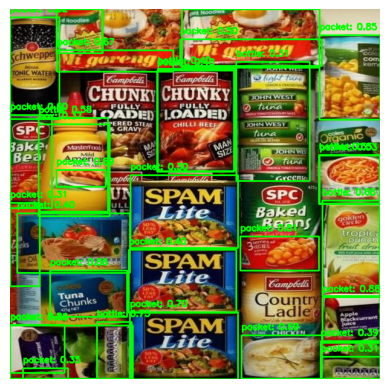

Processing 070_jpg.rf.96872f84b10bf1cf7b471eef6dfa557b.jpg...

image 1/1 /kaggle/input/counting/test/images/070_jpg.rf.96872f84b10bf1cf7b471eef6dfa557b.jpg: 640x640 2 packets, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected 2 objects in 070_jpg.rf.96872f84b10bf1cf7b471eef6dfa557b.jpg


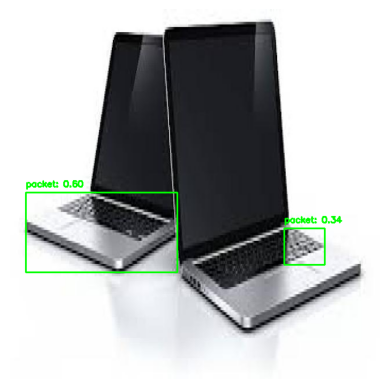

Processing 048_jpg.rf.b1ddaef3fe3d88ae7892b1e3336355ad.jpg...

image 1/1 /kaggle/input/counting/test/images/048_jpg.rf.b1ddaef3fe3d88ae7892b1e3336355ad.jpg: 640x640 11 bottles, 1 chips, 4 packets, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 16 objects in 048_jpg.rf.b1ddaef3fe3d88ae7892b1e3336355ad.jpg


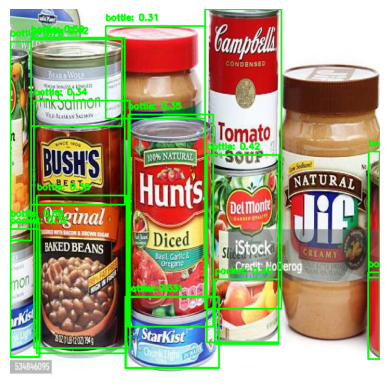

Processing 000_jpg.rf.3d5b052b36239a95325538e8e8068e4d.jpg...

image 1/1 /kaggle/input/counting/test/images/000_jpg.rf.3d5b052b36239a95325538e8e8068e4d.jpg: 640x640 3 bottles, 21 boxs, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 24 objects in 000_jpg.rf.3d5b052b36239a95325538e8e8068e4d.jpg


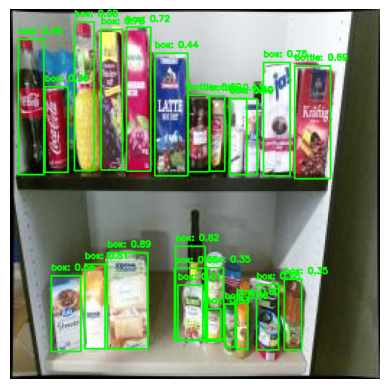

Processing suggested-kuWQyChvoc0EenfArOr8_jpg.rf.2689ecfaf6381ce3c17e6da6eb9c4efa.jpg...

image 1/1 /kaggle/input/counting/test/images/suggested-kuWQyChvoc0EenfArOr8_jpg.rf.2689ecfaf6381ce3c17e6da6eb9c4efa.jpg: 640x640 13 bottles, 5 packets, 16.3ms
Speed: 2.3ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Detected 18 objects in suggested-kuWQyChvoc0EenfArOr8_jpg.rf.2689ecfaf6381ce3c17e6da6eb9c4efa.jpg


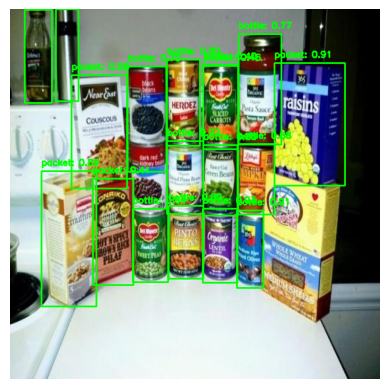


Item count for each image:
                                               Image  Item Count
0  suggested-Q1GV0EkEDcdMolD95Nz3_jpg.rf.af0816a3...          32
1    070_jpg.rf.96872f84b10bf1cf7b471eef6dfa557b.jpg           2
2    048_jpg.rf.b1ddaef3fe3d88ae7892b1e3336355ad.jpg          16
3    000_jpg.rf.3d5b052b36239a95325538e8e8068e4d.jpg          24
4  suggested-kuWQyChvoc0EenfArOr8_jpg.rf.2689ecfa...          18

Results saved to /kaggle/working/item_counts.csv


In [8]:
# Load the YOLO model (use a pretrained model or a fine-tuned model if available)
# Path to the folder containing test images
images_folder = "/kaggle/input/counting/test/images"  # Update this path as needed

# Check if the folder exists
if not os.path.exists(images_folder):
    raise FileNotFoundError(f"The folder {images_folder} does not exist. Please check the path.")

# Initialize a list to store results
results_list = []

# Function to visualize detections (optional)
def visualize_detections(image_path, results, save_path=None):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        confidence = box.conf[0]  # Confidence score
        cls_id = int(box.cls[0])  # Class ID
        
        # Draw bounding box and label on the image
        label = f"{model.names[cls_id]}: {confidence:.2f}"
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        img = cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save or display the image with detections
    if save_path:
        plt.imsave(save_path, img)
    else:
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Loop through all images in the folder
for image_name in os.listdir(images_folder):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
        image_path = os.path.join(images_folder, image_name)
        print(f"Processing {image_name}...")

        try:
            # Run YOLO inference
            results = model(image_path, conf=0.3)  # Adjust confidence threshold if needed

            # Count detected objects
            object_count = len(results[0].boxes)
            print(f"Detected {object_count} objects in {image_name}")

            # Visualize detections (optional)
            visualize_detections(image_path, results)

            # Append results to the list
            results_list.append({"Image": image_name, "Item Count": object_count})

        except Exception as e:
            print(f"Error processing {image_name}: {e}")
            continue

# Create a DataFrame for tabular output
results_df = pd.DataFrame(results_list)

# Save results to a CSV file
output_csv_path = "/kaggle/working/item_counts.csv"
results_df.to_csv(output_csv_path, index=False)

# Display the results in console
print("\nItem count for each image:")
print(results_df)

print(f"\nResults saved to {output_csv_path}")